# Analyse Exploratoire des données du Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('titanic3.xls')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
data.describe() 

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [182]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

## Le taux de survie général

Text(0.5, 1.0, 'Pourcentage de survie')

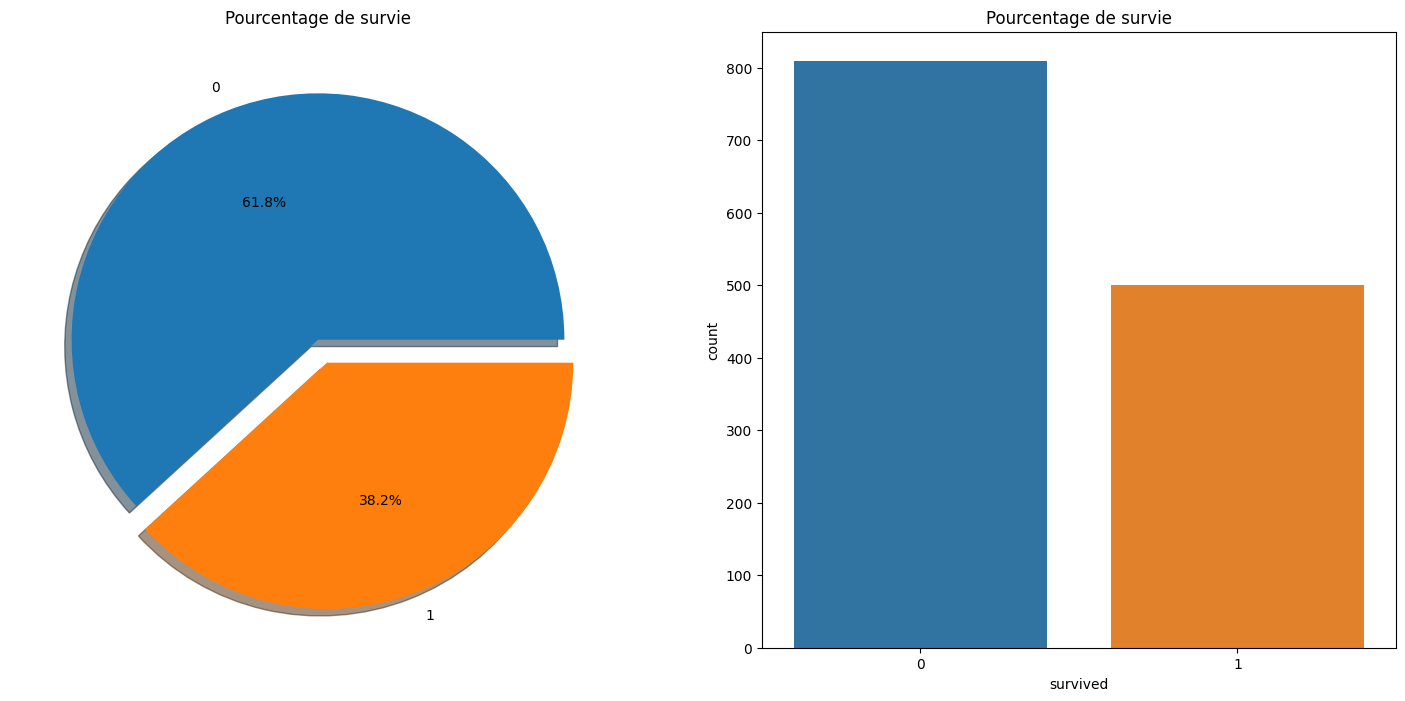

In [62]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pourcentage de survie')
ax[0].set_ylabel('')
sns.countplot(x='survived', data=data, ax=ax[1])
ax[1].set_title('Pourcentage de survie')

Sur les 1309 passagers, seul 38.2% ont survécu soit 500 passagers. 

## Taux de survie par "sexe"

In [63]:
data.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

Text(0.5, 1.0, 'Répartition du taux de survie en fonction du sexe du passager')

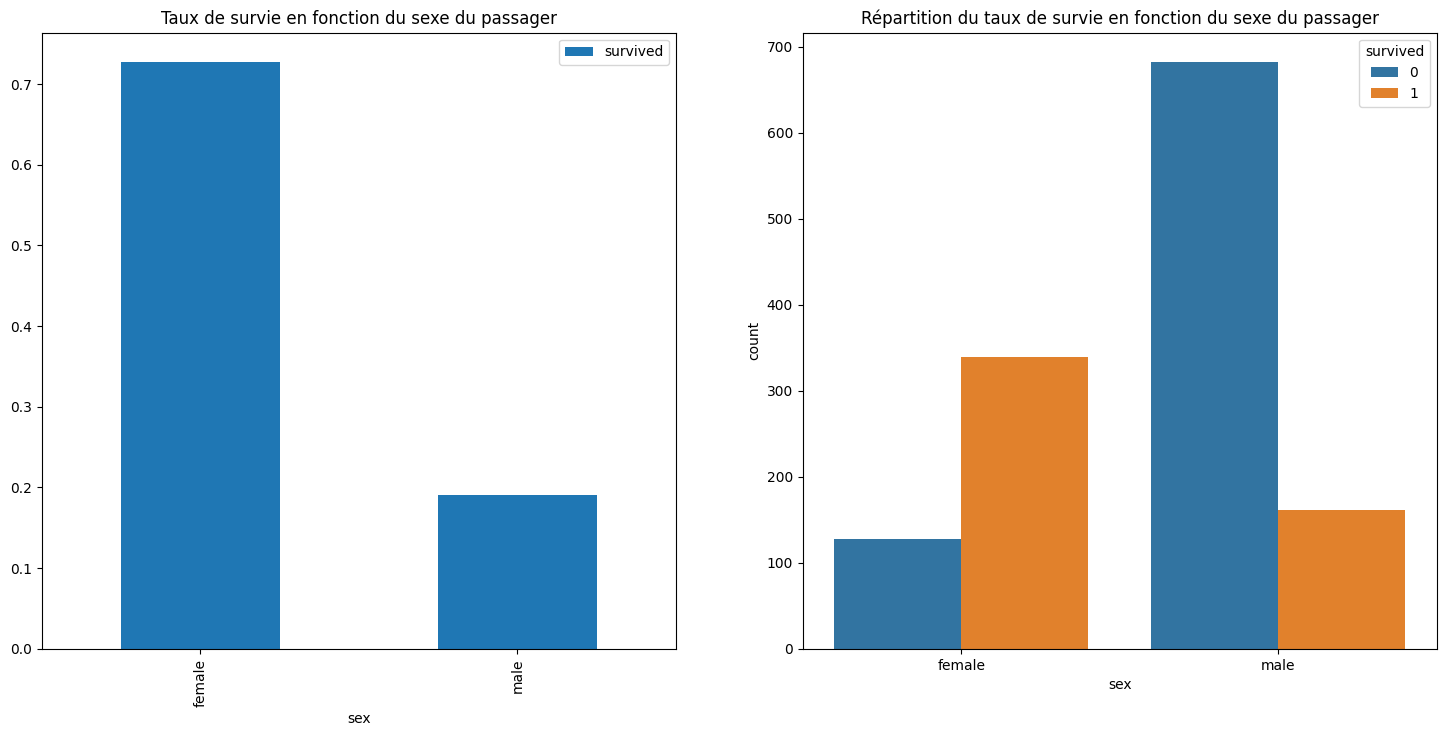

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['sex', 'survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Taux de survie en fonction du sexe du passager')
sns.countplot(x='sex', hue='survived', data = data, ax = ax[1])
ax[1].set_title('Répartition du taux de survie en fonction du sexe du passager')

Alors que les que les hommes étaient bien plus nombreux que les femmes, le nombre de ces dernières représente le double des hommes. Le taux de survie est de plus 70 %, alors que celui des hommes ne dépasse pas les 20%.

## Taux de survie par 'classe'

In [65]:
pd.crosstab(data.pclass, data.survived, margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


Text(0.5, 1.0, 'classe : taux de survie')

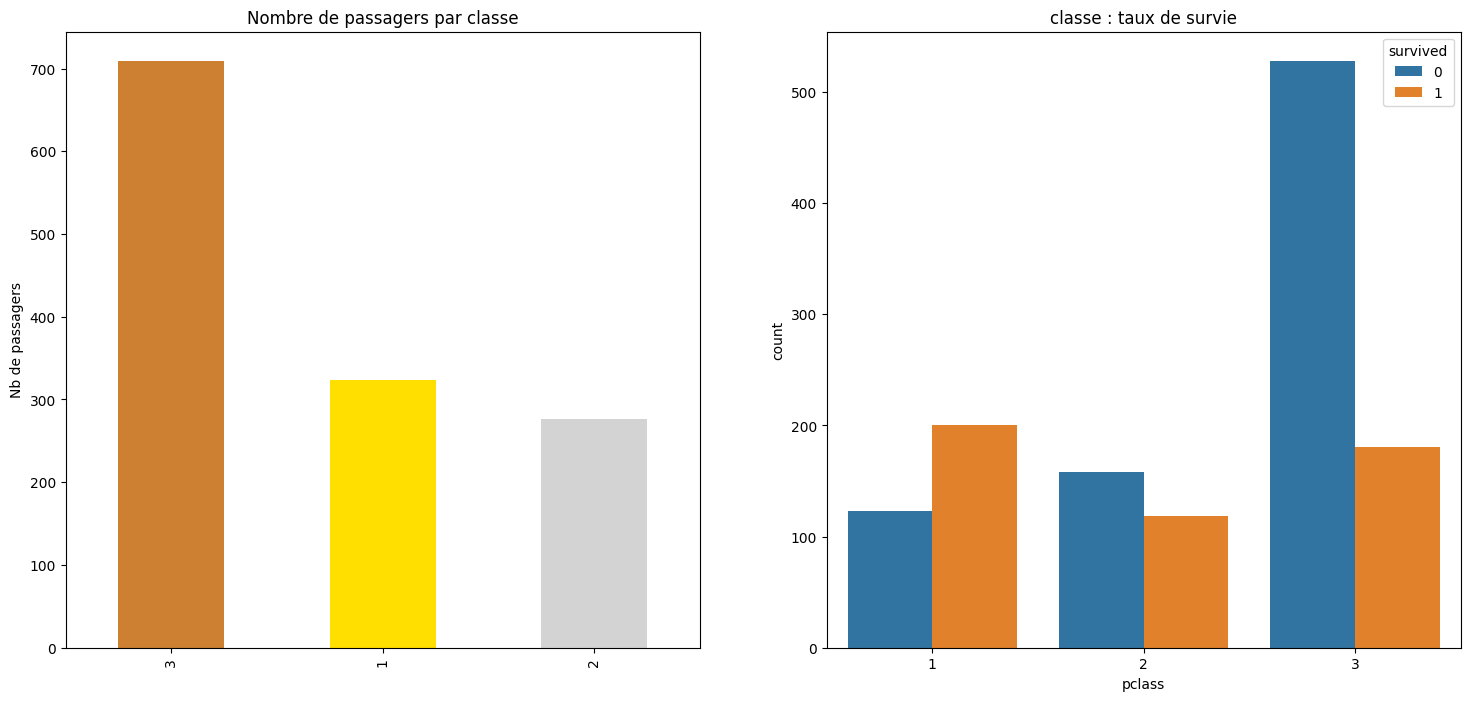

In [66]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax= ax[0])
ax[0].set_title('Nombre de passagers par classe')
ax[0].set_ylabel('Nb de passagers')
sns.countplot(x='pclass', hue='survived', data=data, ax=ax[1])
ax[1].set_title('classe : taux de survie')

La proportion de survie apparait comme plus importante en première classe, alors que ces passagers ne représentent qu'un quart de la population générale. La troisième classe (2/3 des passagers) possède le taux se survie le plus faible.

## Taux de survie en fonction du 'sexe' et de la 'classe'

In [12]:
pd.crosstab([data.sex, data.survived], data.pclass, margins=True).style.background_gradient(cmap='summer_r')

<AxesSubplot: xlabel='pclass', ylabel='survived'>

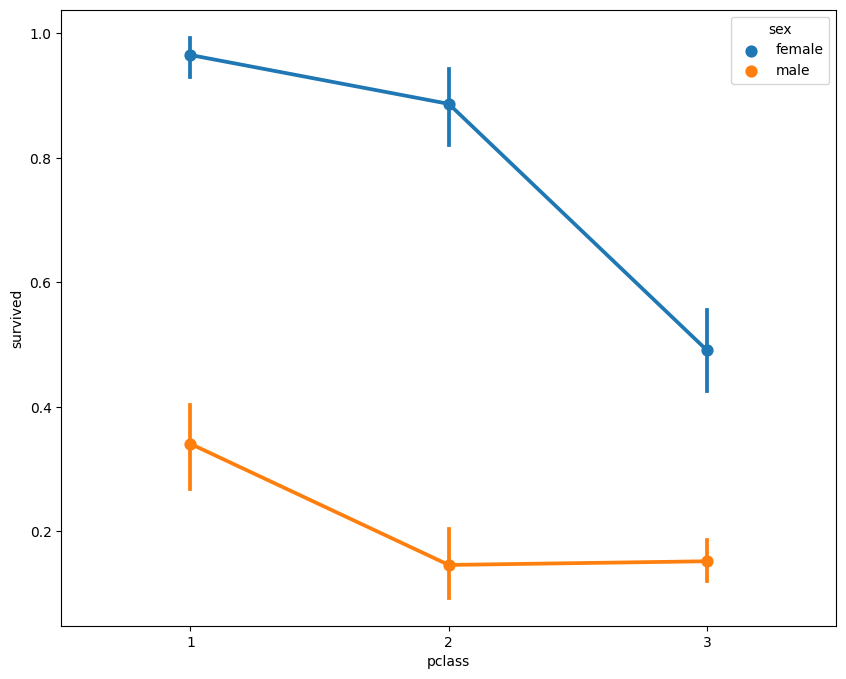

In [17]:
f, ax = plt.subplots(figsize=(10,8))
sns.pointplot(x='pclass',y='survived',hue='sex',data=data, ax=ax)

Le taux de survie des femmes en première classe est proche de 95%, alors que celui des hommes se trouve autour de 35%. Pour les femmes le taux se survie diminue légèrement en seconde classe et chutte à 50% en troisième classe. Pour les hommes le taux de survie est le même en seconde et troisième classe.

## Taux de survie en fonction de l'"age"

In [69]:
print(f'''Le vieux passager a: {round(data['age'].max(), 2)} ans.''')
print(f'''Le jeune passager a: {round(data['age'].min(), 2)} ans.''')
print(f'''La moyenne d'âge des passagers est de {round(data['age'].mean(), 2)} ans.''')

Le vieux passager a: 80.0 ans.
Le jeune passager a: 0.17 ans.
La moyenne d'âge des passagers est de 29.88 ans.


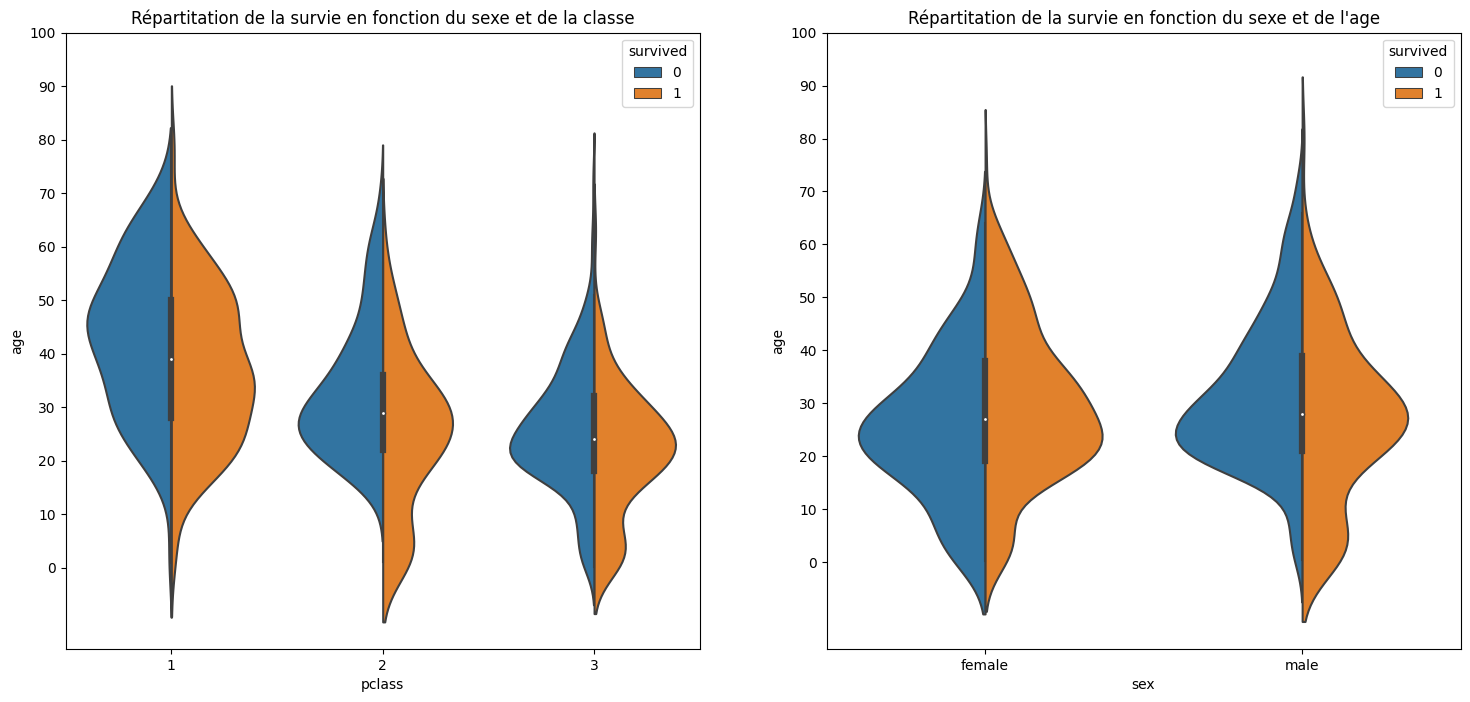

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="pclass",y="age", hue="survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Répartitation de la survie en fonction du sexe et de la classe')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="sex",y="age", hue="survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Répartitation de la survie en fonction du sexe et de l\'age')
ax[1].set_yticks(range(0,110,10))

La proportion d'enfant augmente en fonction de la classe et semble présenter un bon taux de survie. Les chances de survie pour les passagers entre 20 et 50 ans est élevé, d'autant si c'était une femme. Tandis que le taux se survie diminue pour les hommes, d'autant plus rapidement en fonction de la classe.

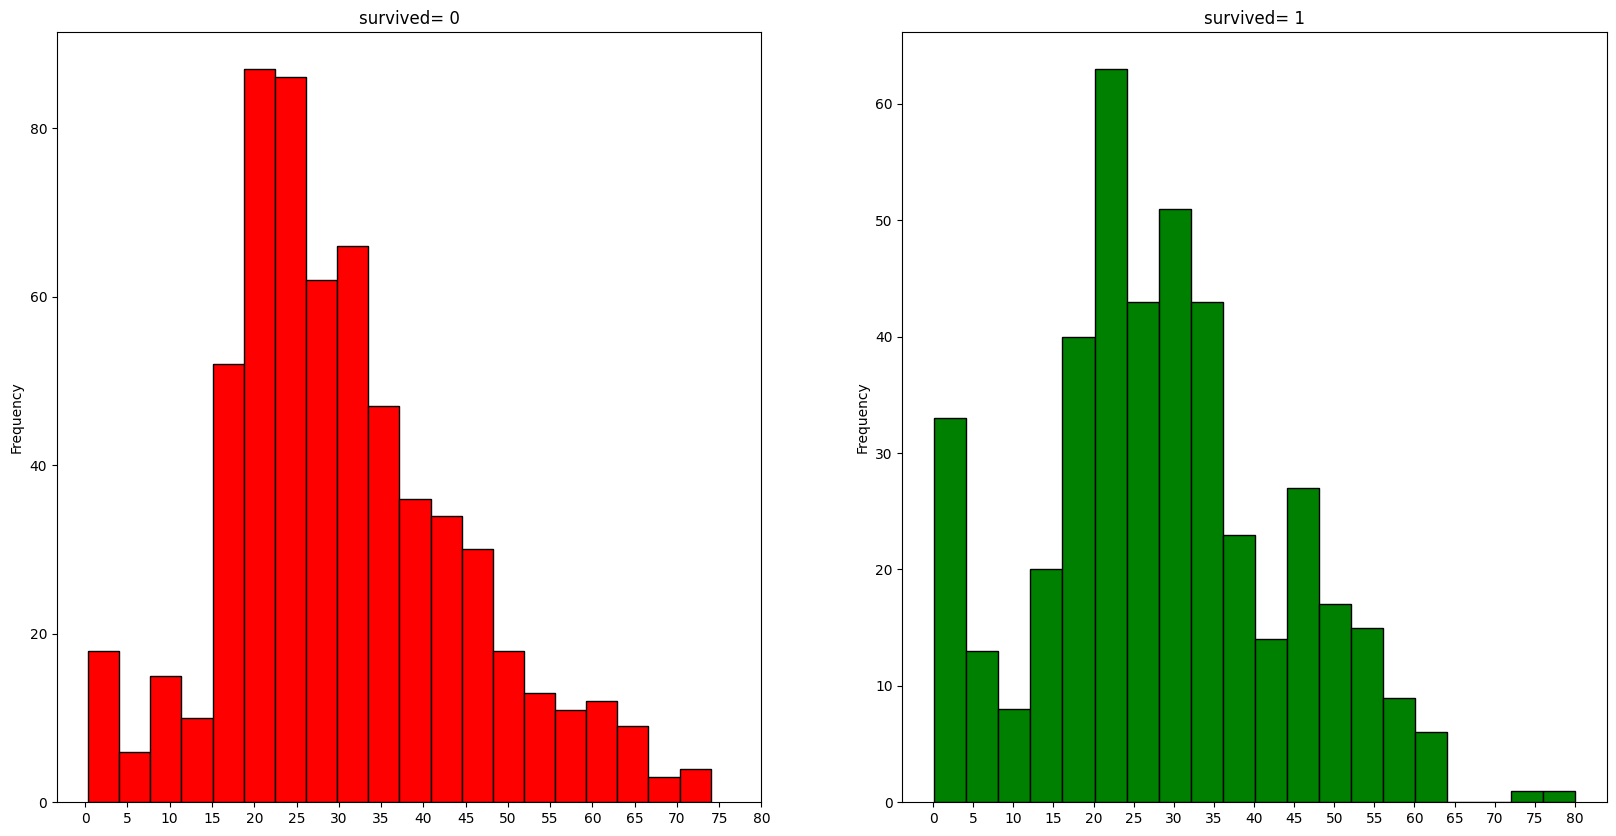

In [19]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['survived']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['survived']==1].age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

Les extrêmes en âge présente de bon taux de survie, contrairement aux personnes entre 30 et 40 ans.

In [131]:
pd.crosstab([data.embarked,data.pclass],[data.sex, data.survived],margins=True).style.background_gradient(cmap='summer_r')

Taux de survie en fonction du 'port d'embarcation'.

<AxesSubplot: xlabel='embarked', ylabel='survived'>

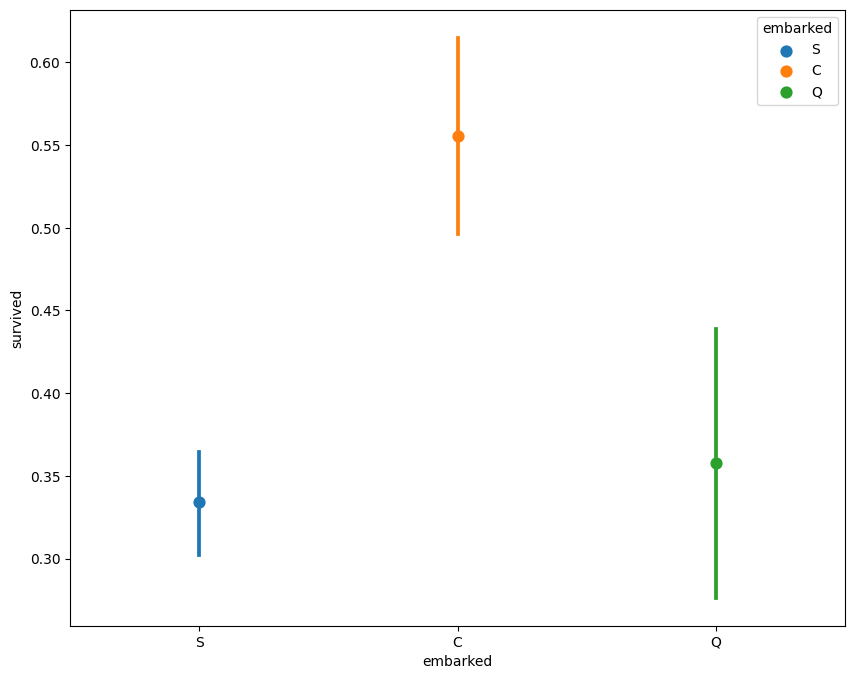

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
sns.pointplot(x='embarked',y='survived',hue='embarked',data=data, ax=ax)

Le taux de survie du port C est le plus élevé.

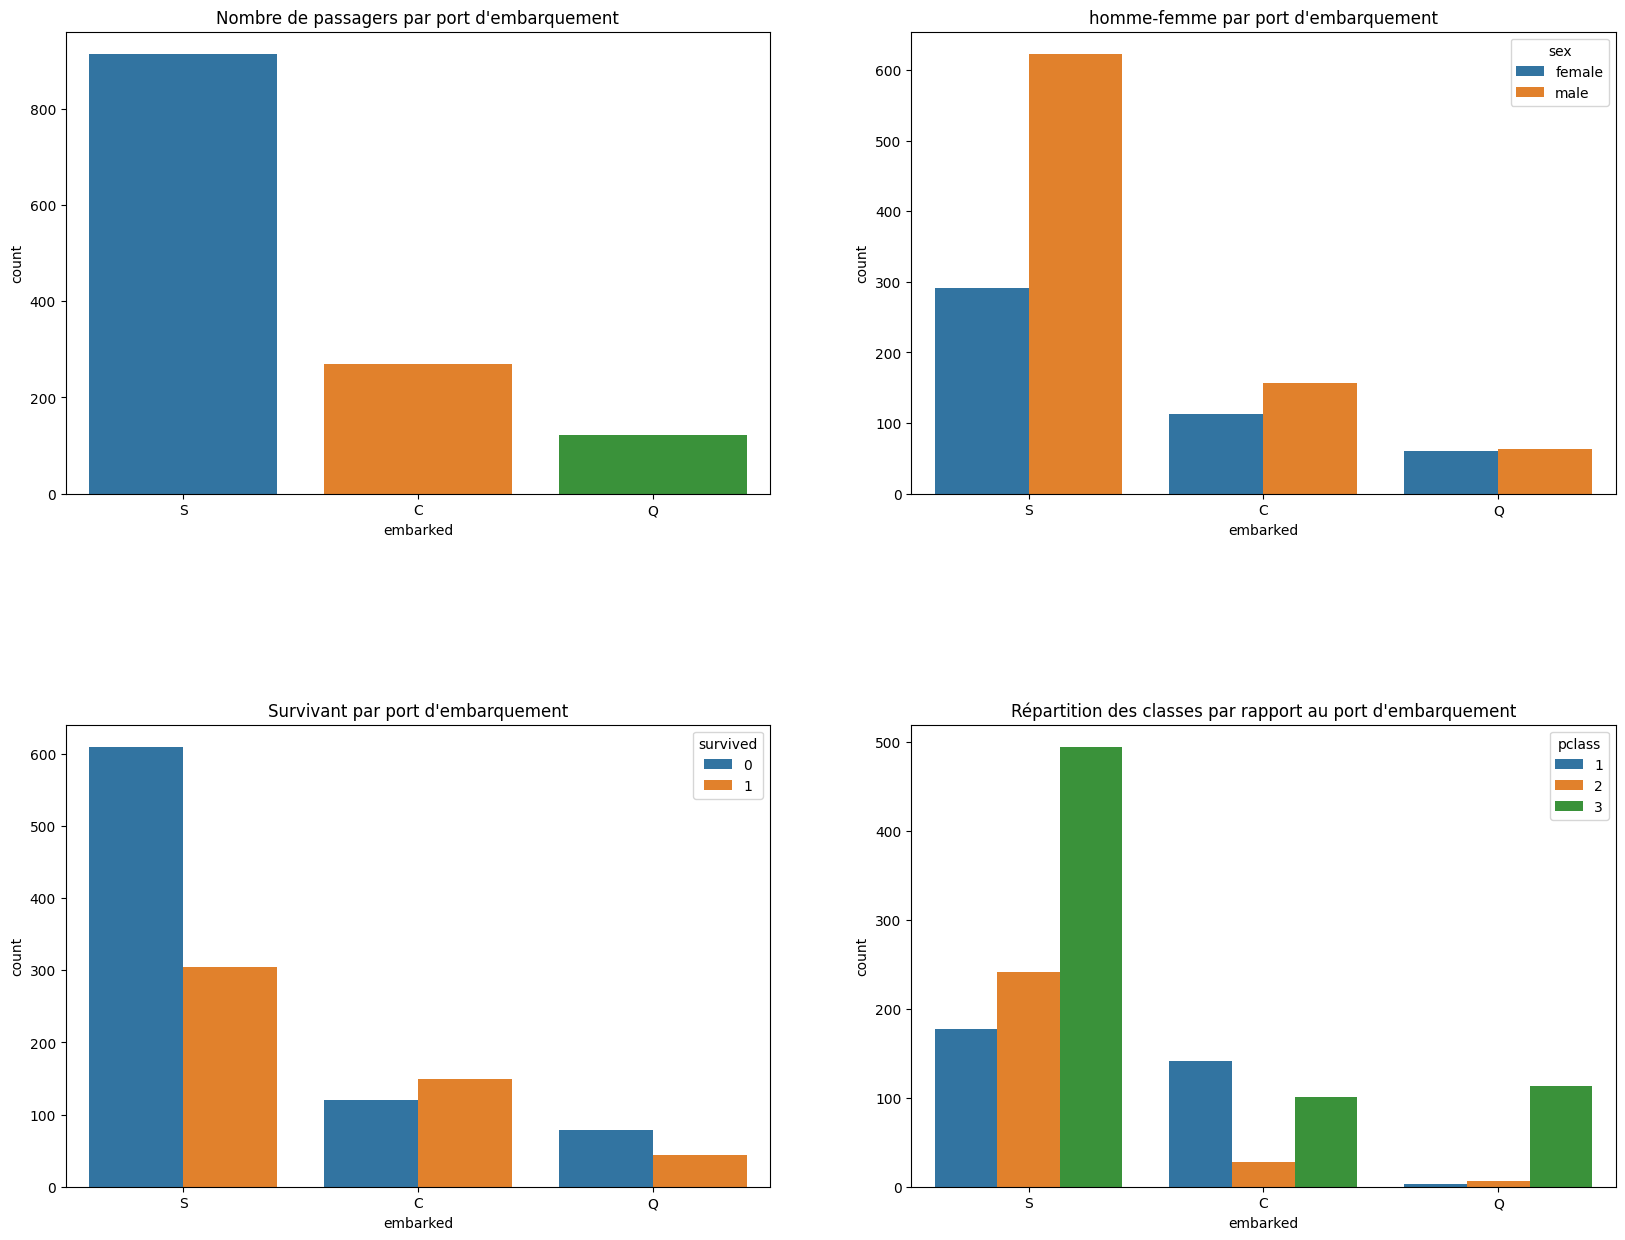

In [21]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('Nombre de passagers par port d\'embarquement')
sns.countplot(x='embarked',hue='sex',data=data,ax=ax[0,1])
ax[0,1].set_title('homme-femme par port d\'embarquement')
sns.countplot(x='embarked',hue='survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Survivant par port d\'embarquement')
sns.countplot(x='embarked',hue='pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Répartition des classes par rapport au port d\'embarquement')
plt.subplots_adjust(wspace=0.2,hspace=0.5)

Le haut taux de survie du port C peut s'expliquer par sa grande proportion de personne en première classe. Alors que les ports S et Q possèdent une majorité de troisième classe, qui possédaient un taux de survie moindre.

c:\environnement\.venv\lib\site-packages\seaborn\categorical.py:3024: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


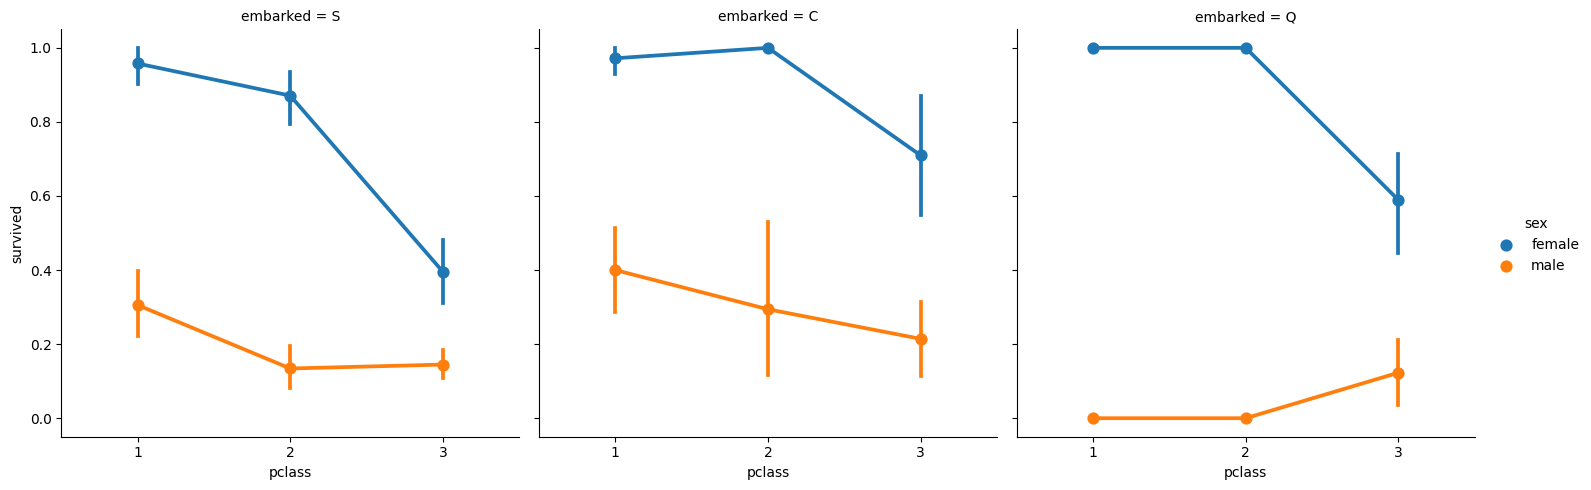

In [38]:
sns.catplot(x='pclass',y='survived',hue='sex',col='embarked',data=data, kind="point",ax=ax)

Pour les femmes de premières classes et deuxième classe, le port d'origine ne change rien à leur haut taux de survie. Pour le port Q, la proportion d'homme de troisième classe peut expliquer le taux de survie plus important.

In [25]:
data['embarked'].fillna('S', inplace=True)

In [24]:
data.embarked.isnull().any()

True

## Taux de survie en fonction du 'nombre de frère et soeur'

In [28]:
pd.crosstab([data.sibsp], data.survived).style.background_gradient(cmap='summer_r')

survived,0,1
sibsp,,
0,582,309
1,156,163
2,23,19
3,14,6
4,19,3
5,6,0
8,9,0


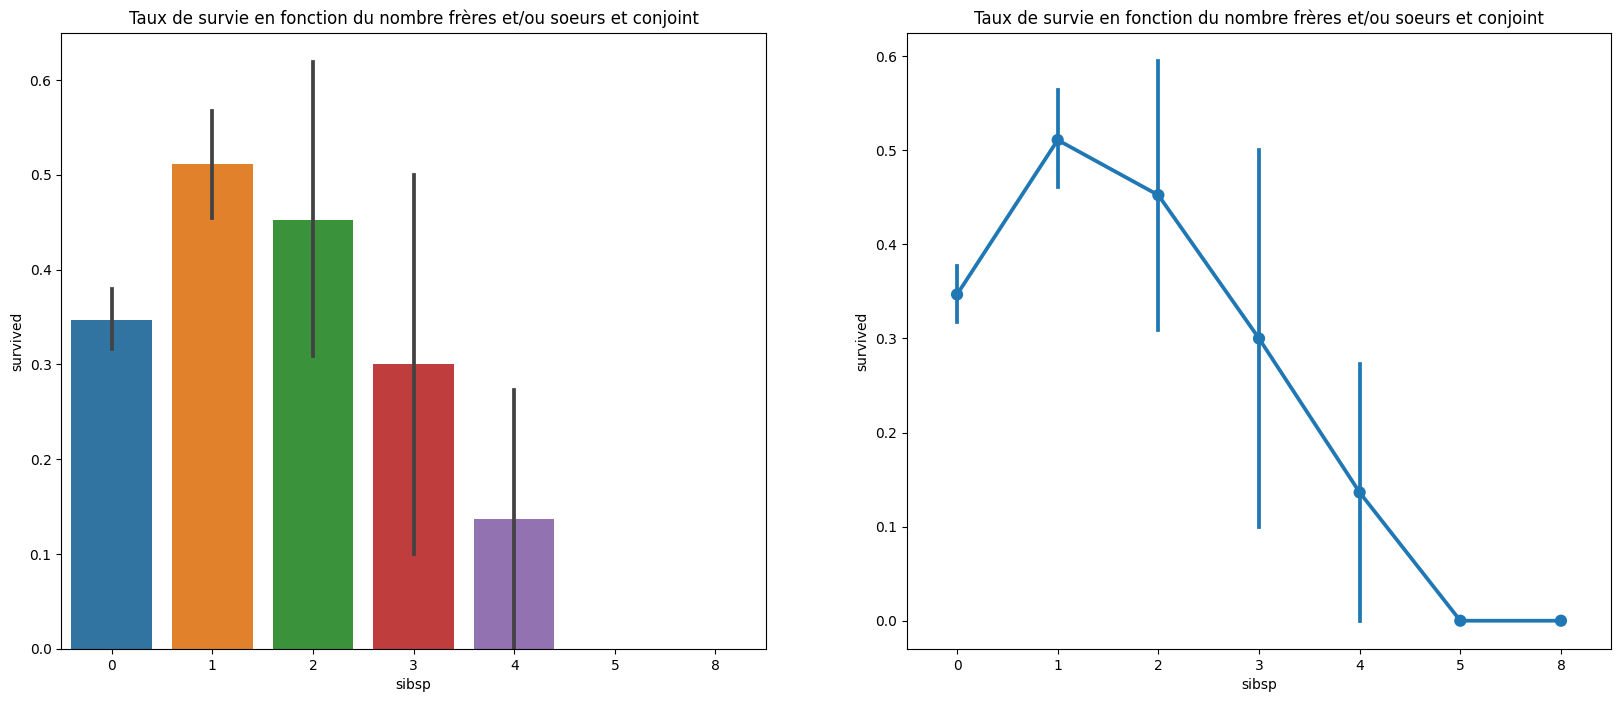

In [29]:
f,ax= plt.subplots(1, 2, figsize=(20,8))
sns.barplot(x='sibsp',y='survived', data=data, ax=ax[0])
ax[0].set_title('Taux de survie en fonction du nombre frères et/ou soeurs et conjoint')
sns.pointplot(x='sibsp',y='survived', data=data, ax=ax[1])
ax[1].set_title('Taux de survie en fonction du nombre frères et/ou soeurs et conjoint')
plt.close(2)

In [139]:
pd.crosstab(data.sibsp, data.pclass).style.background_gradient(cmap='summer_r')

pclass,1,2,3
sibsp,,,
0,198,182,511
1,113,82,124
2,8,12,22
3,4,1,15
4,0,0,22
5,0,0,6
8,0,0,9


Les personnes montaient seules possèdent un taux de survie de 35%. Le taux monte à 50% lorsqu'un autre membre de la famille est présent. Au dela de deux, il diminue. Aucune famille au delà de quatre membres n'a survécu, ces dernières se trouvaient en troisième classe.

## Taux de survie en fonction de la relation parent/enfants

In [140]:
pd.crosstab(data.parch, data.pclass).style.background_gradient(cmap='summer_r')

pclass,1,2,3
parch,,,
0,242,206,554
1,50,43,77
2,27,25,61
3,2,3,3
4,2,0,4
5,0,0,6
6,0,0,2
9,0,0,2


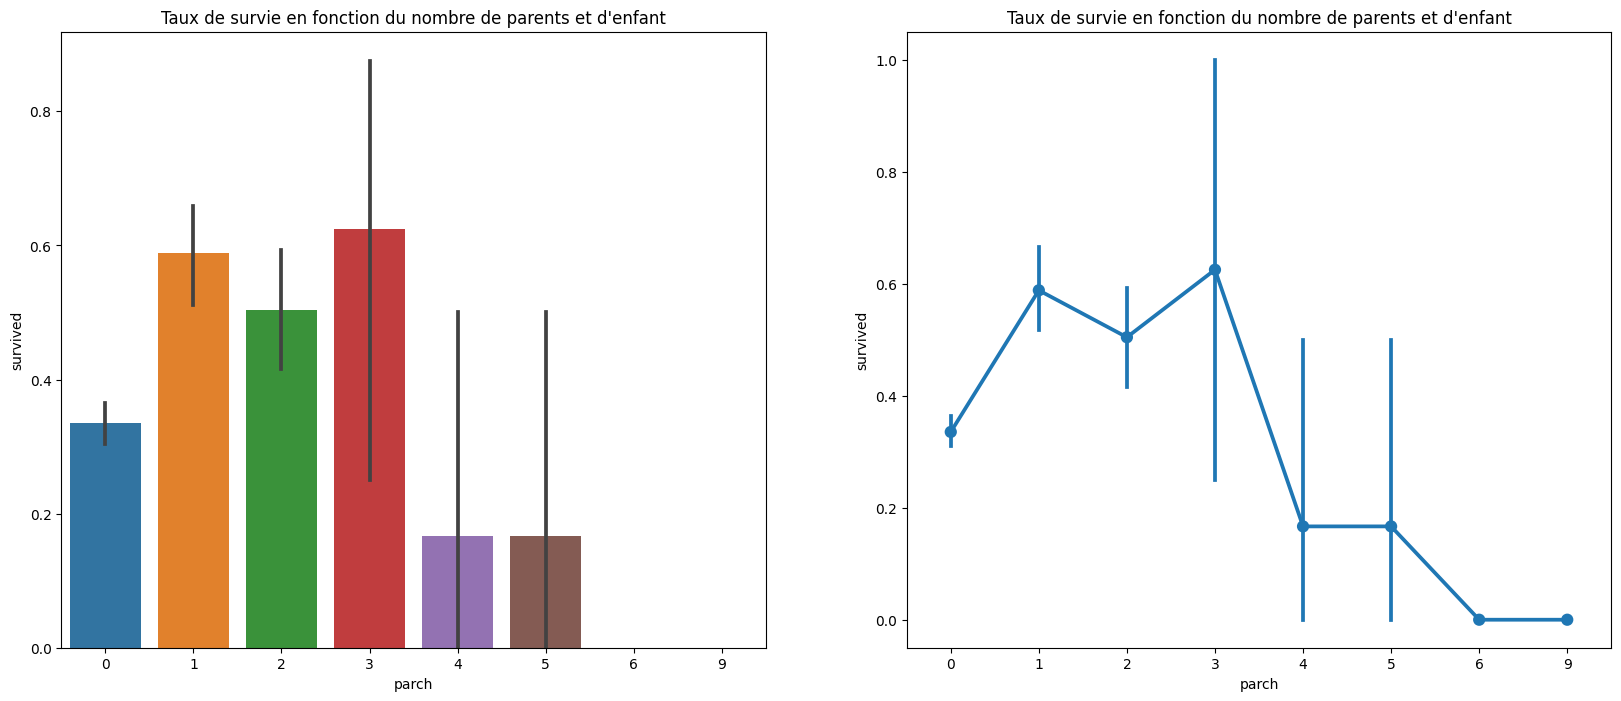

In [141]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='parch',y='survived',data=data,ax=ax[0])
ax[0].set_title('Taux de survie en fonction du nombre de parents et d\'enfant')
sns.pointplot(x='parch',y='survived',data=data,ax=ax[1])
ax[1].set_title('Taux de survie en fonction du nombre de parents et d\'enfant')
plt.close(2)
plt.show()

Le taux se survie est sensiblement le même que la présence de frère et soeur. De même, les familles à 6 membres n'ont pas survécu, tous se trouvaient en troisième classe.

Taux de survie en fonction du 'prix du billet'

In [142]:
print(f'''Le prix du billet le plus élevé était {data['fare'].max()}''')
print(f'''Le prix bu billet le plus faible était: {data['fare'].min()}''')
print(f'''Le prix moyen du billet était: {round(data['fare'].mean(), 2)}''')

Le prix du billet le plus élevé était 512.3292
Le prix bu billet le plus faible était: 0.0
Le prix moyen du billet était: 33.3


Text(0.5, 1.0, 'Prix du billet pour les troisième classe')

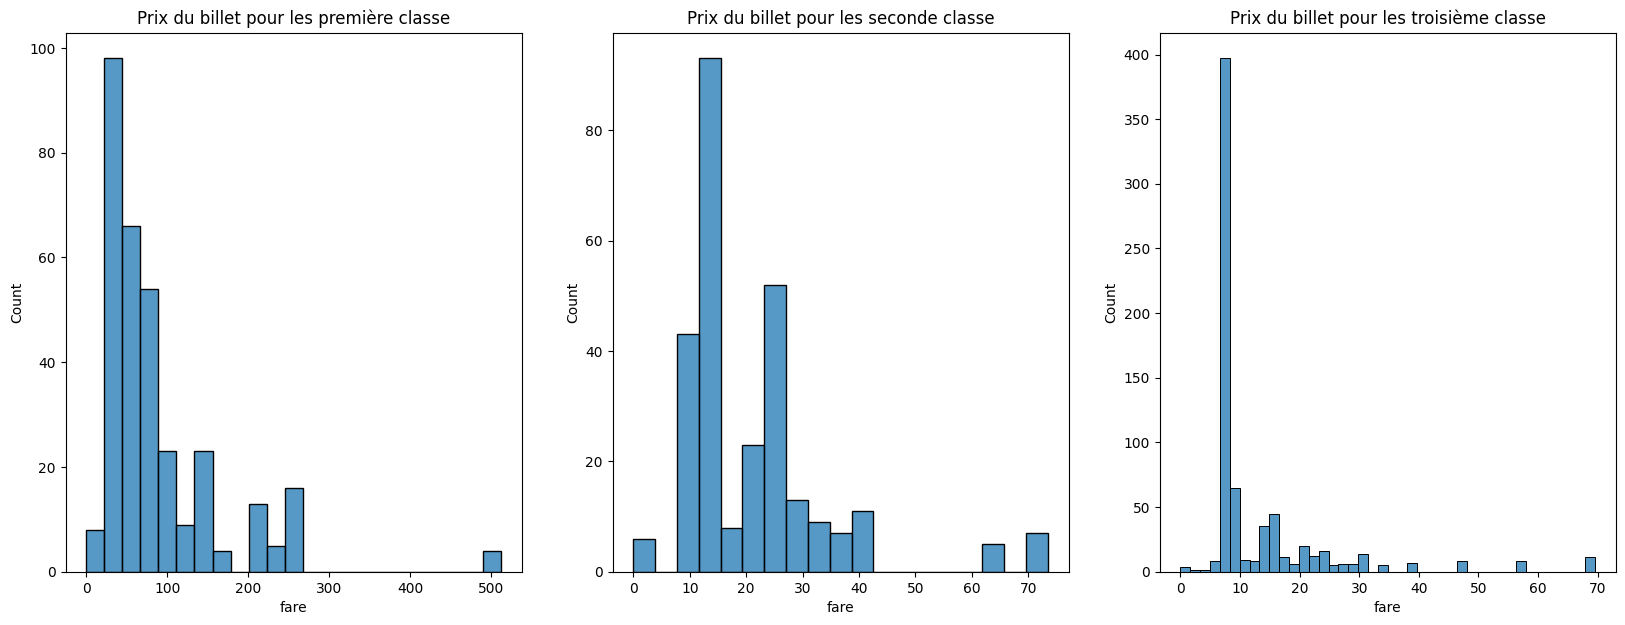

In [143]:
f,ax=plt.subplots(1,3,figsize=(20,7))
sns.histplot(data[data['pclass']==1].fare,ax=ax[0])
ax[0].set_title('Prix du billet pour les première classe')
sns.histplot(data[data['pclass']==2].fare,ax=ax[1])
ax[1].set_title('Prix du billet pour les seconde classe')
sns.histplot(data[data['pclass']==3].fare,ax=ax[2])
ax[2].set_title('Prix du billet pour les troisième classe')

Les paramètres sex, pclass, age, embarked, parch et sibsp étudiés indiquent que cela influence sur le taux de survie d'un passager lors du naufrage de Titanic.

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4452\531360682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


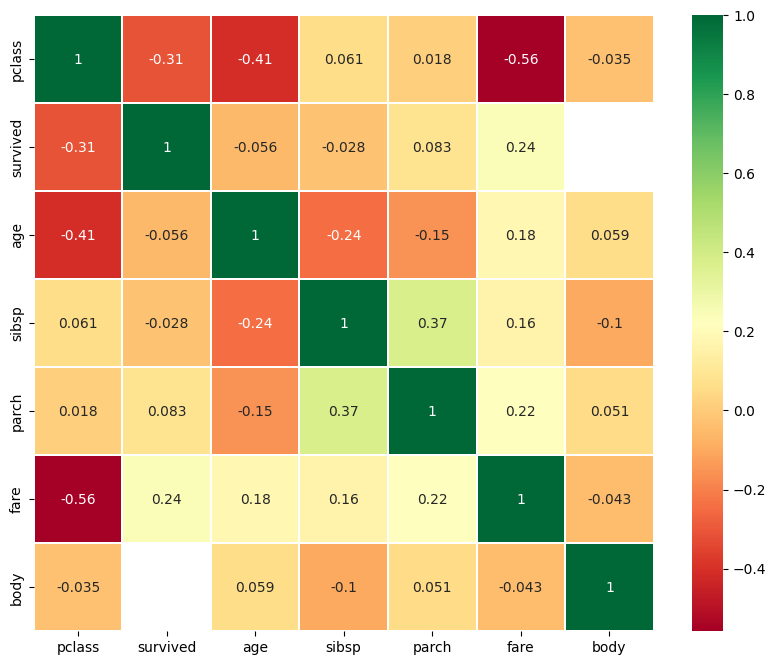

In [39]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)

Feature Engineering

In [197]:
data['age_band']=0
data.loc[data['age']<=16,'age_band']=0
data.loc[(data['age']>16)&(data['age']<=32),'age_band']=1
data.loc[(data['age']>32)&(data['age']<=48),'age_band']=2
data.loc[(data['age']>48)&(data['age']<=64),'age_band']=3
data.loc[data['age']>64,'age_band']=4
data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial,age_band
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,0


In [168]:
data['age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,age_band
1,575
2,473
0,142
3,106
4,13


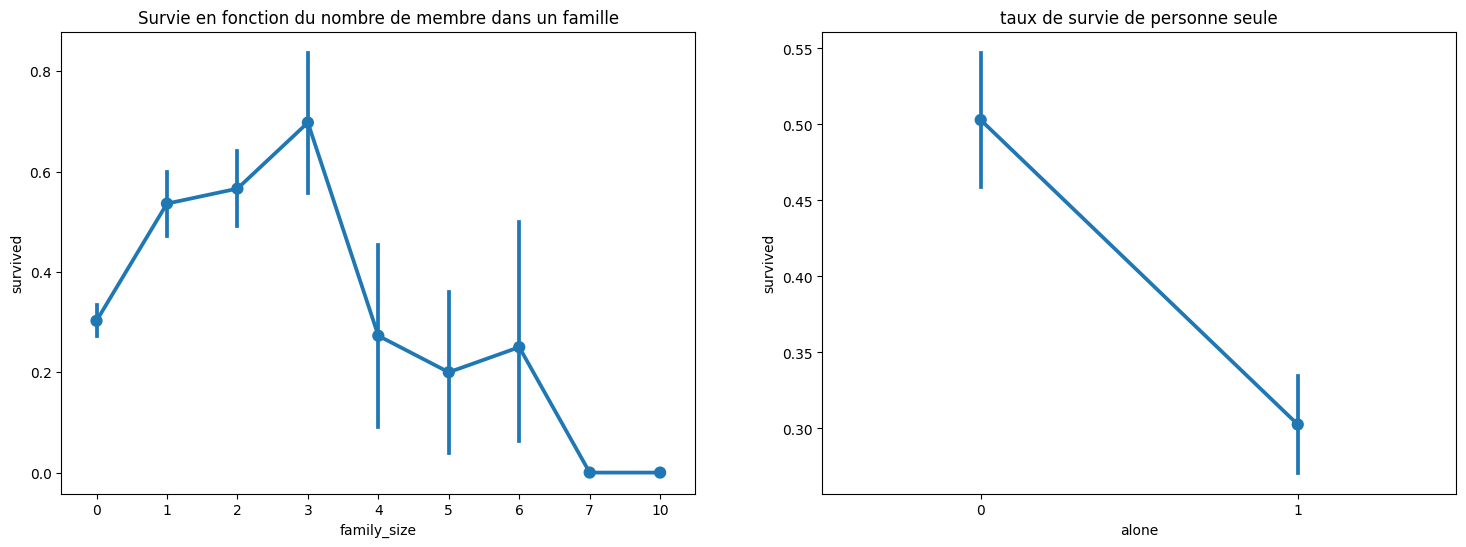

In [40]:
data['family_size']=0
data['family_size']=data['parch']+data['sibsp']
data['alone']=0
data.loc[data.family_size==0,'alone']=1

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='family_size',y='survived',data=data,ax=ax[0])
ax[0].set_title('Survie en fonction du nombre de membre dans un famille')
sns.pointplot(x='alone',y='survived',data=data,ax=ax[1])
ax[1].set_title('taux de survie de personne seule')
plt.close(2)
plt.close(3)
plt.show()

In [201]:
data['fare_range']= pd.qcut(data['fare'], 4)
data.groupby(['fare_range'])['survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,survived
fare_range,
"(-0.001, 7.896]",0.228487
"(7.896, 14.454]",0.284375
"(14.454, 31.275]",0.435976
"(31.275, 512.329]",0.585139


In [203]:
data['fare_cat']=0
data.loc[data['fare']<=7.91,'fare_cat']=0
data.loc[(data['fare']>7.91)&(data['fare']<=14.454),'fare_cat']=1
data.loc[(data['fare']>14.454)&(data['fare']<=31),'fare_cat']=2
data.loc[(data['fare']>31)&(data['fare']<=513),'fare_cat']=3

<AxesSubplot: xlabel='fare_cat', ylabel='survived'>

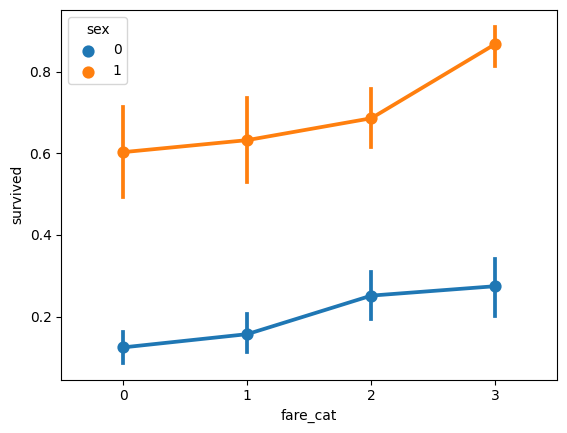

In [204]:
sns.pointplot(x='fare_cat',y='survived',data=data,hue='sex')

In [205]:
data['sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,initial,age_band,fare_cat,fare_range
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,0,2,NaN,"St Louis, MO",Miss,1,3,"(31.275, 512.329]"
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,0,11,NaN,"Montreal, PQ / Chesterville, ON",Master,0,3,"(31.275, 512.329]"
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0,3,"(31.275, 512.329]"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,0,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,1,3,"(31.275, 512.329]"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,1,3,"(31.275, 512.329]"
5,1,1,"Anderson, Mr. Harry",0,48.0000,0,0,19952,26.5500,E12,0,3,NaN,"New York, NY",Mr,2,2,"(14.454, 31.275]"
6,1,1,"Andrews, Miss. Kornelia Theodosia",1,63.0000,1,0,13502,77.9583,D7,0,10,NaN,"Hudson, NY",Miss,3,3,"(31.275, 512.329]"
7,1,0,"Andrews, Mr. Thomas Jr",0,39.0000,0,0,112050,0.0000,A36,0,NaN,NaN,"Belfast, NI",Mr,2,0,"(-0.001, 7.896]"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1,53.0000,2,0,11769,51.4792,C101,0,D,NaN,"Bayside, Queens, NY",Mrs,3,3,"(31.275, 512.329]"
9,1,0,"Artagaveytia, Mr. Ramon",0,71.0000,0,0,PC 17609,49.5042,NaN,1,NaN,22.0,"Montevideo, Uruguay",Mr,4,3,"(31.275, 512.329]"


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'pclass'),
  Text(0, 1.5, 'survived'),
  Text(0, 2.5, 'sex'),
  Text(0, 3.5, 'sibsp'),
  Text(0, 4.5, 'parch'),
  Text(0, 5.5, 'embarked'),
  Text(0, 6.5, 'age_band'),
  Text(0, 7.5, 'fare_cat')])

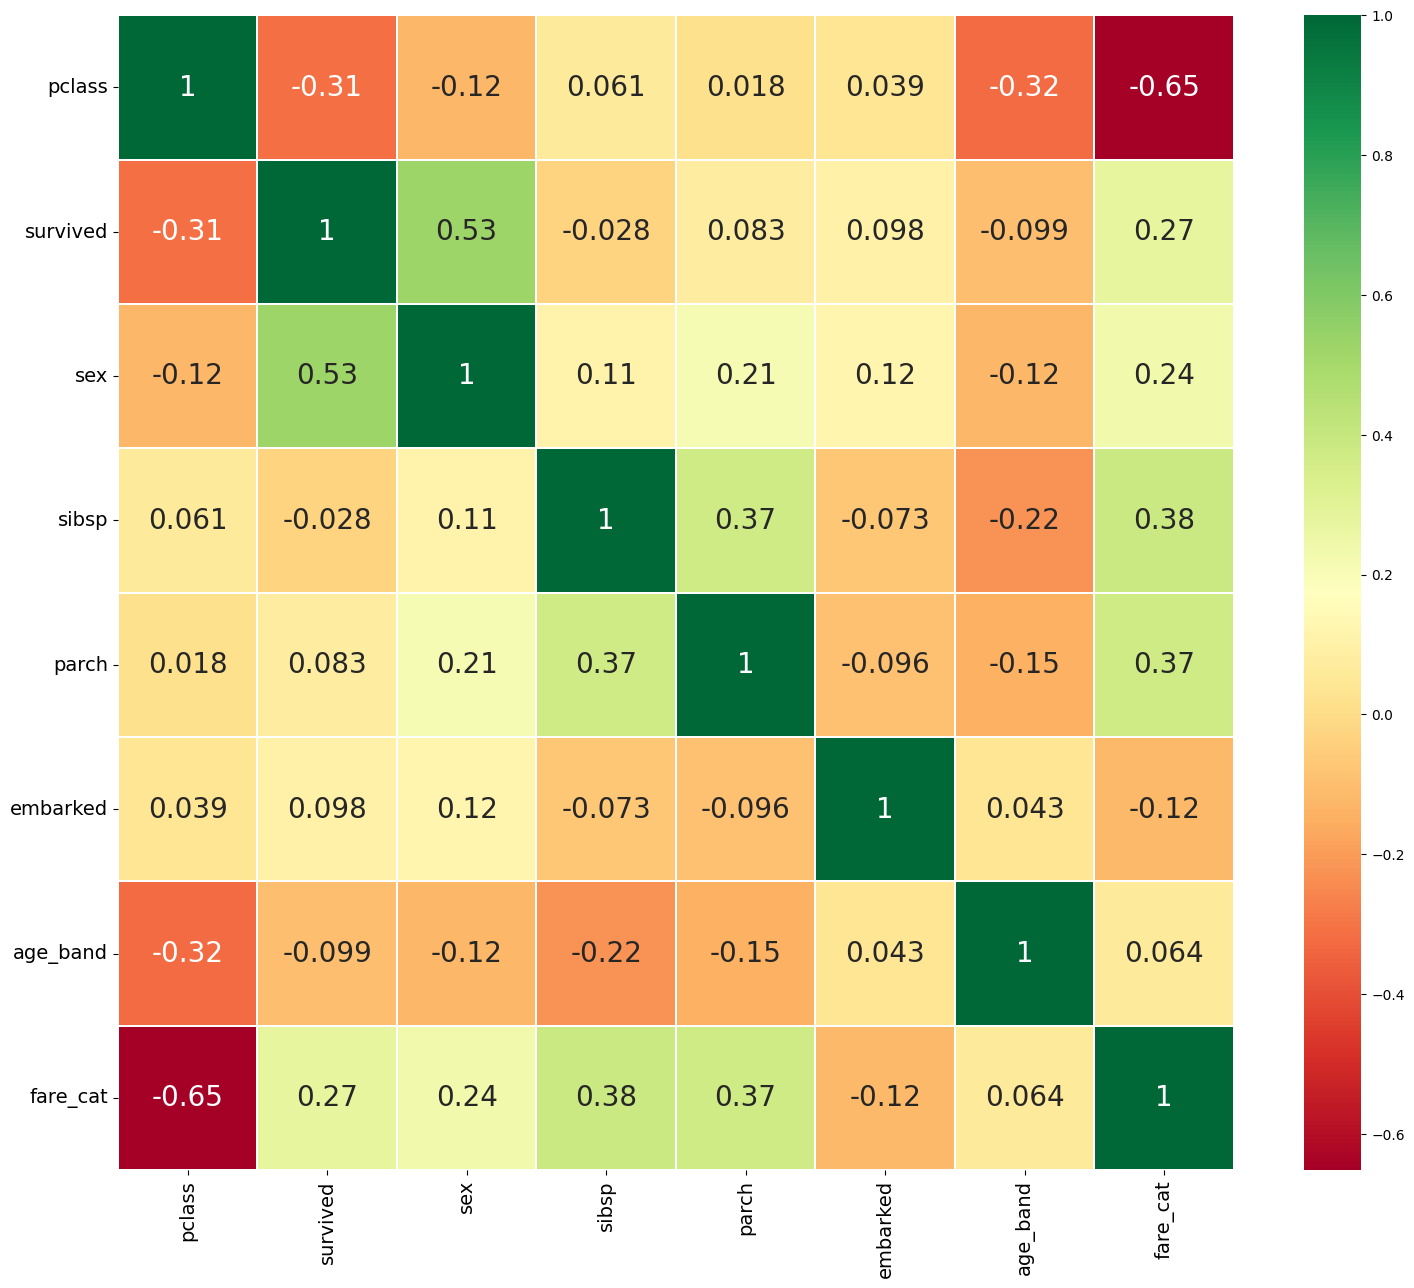

In [206]:
data.drop(['name','age','ticket','fare','cabin','fare_range', 'home.dest', 'body', 'boat', 'initial'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


In [175]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [207]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['survived']

In [208]:
model = svm.SVC(kernel='rbf', C= 1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.7582697201017812


c:\environnement\.venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [209]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.7480916030534351


c:\environnement\.venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [210]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.7480916030534351


c:\environnement\.venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [211]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7379134860050891


In [212]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.7480916030534351


c:\environnement\.venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_1052\3251586742.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
c:\environnement\.venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_1052\3251586742.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
c:\environnement\.venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

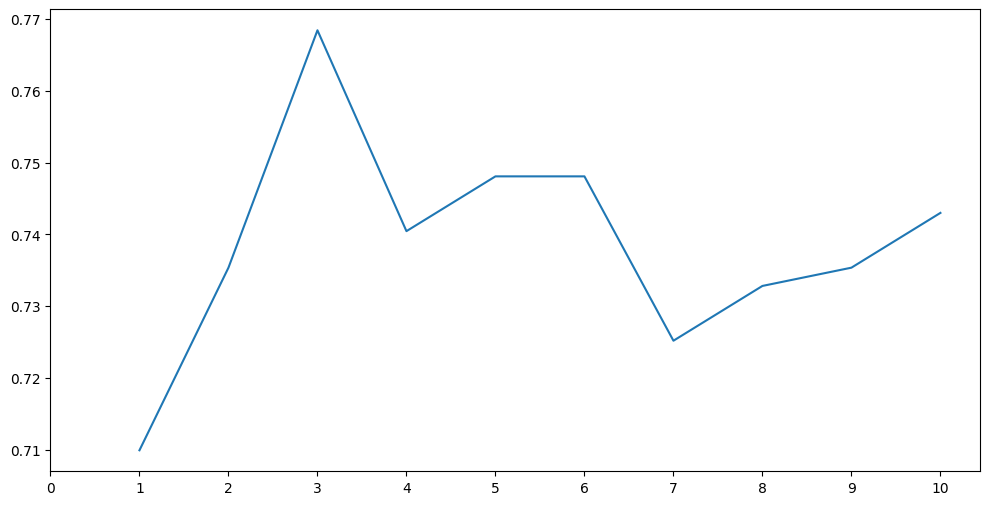

Accuracies for different values of n are: [0.70992366 0.73536896 0.76844784 0.74045802 0.7480916  0.7480916
 0.72519084 0.73282443 0.73536896 0.74300254] with the max value as  0.7684478371501272


In [213]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [214]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.6793893129770993


c:\environnement\.venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [215]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_1052\920559216.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X,train_Y)


The accuracy of the Random Forests is 0.7531806615776081


In [217]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,1.000000,0.000000
Radial Svm,0.999237,0.002290
Logistic Regression,1.000000,0.000000
KNN,0.964105,0.019614
Decision Tree,1.000000,0.000000
Naive Bayes,1.000000,0.000000
Random Forest,1.000000,0.000000


<AxesSubplot: >

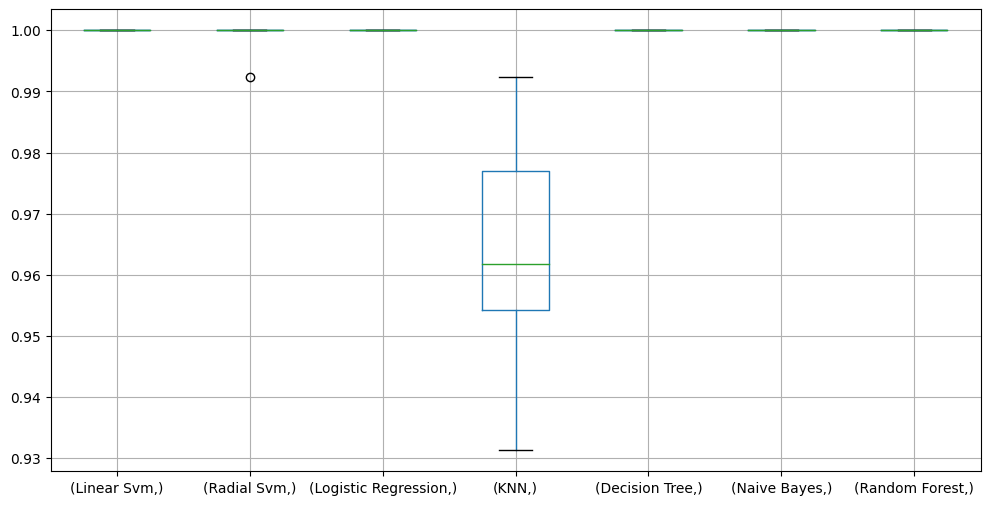

In [218]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

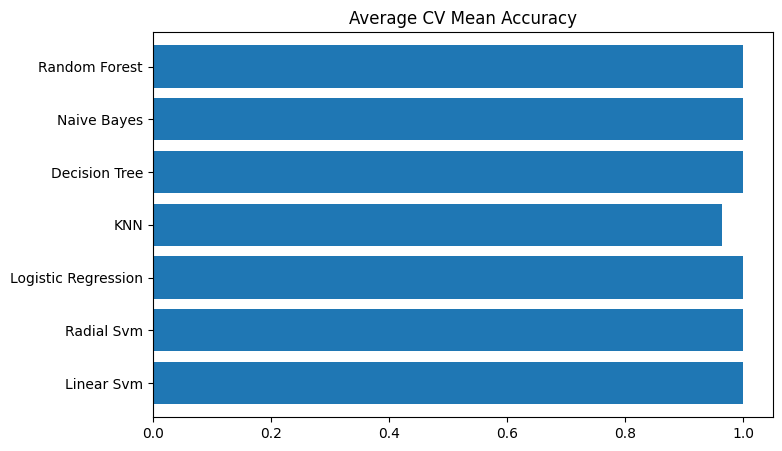

In [219]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

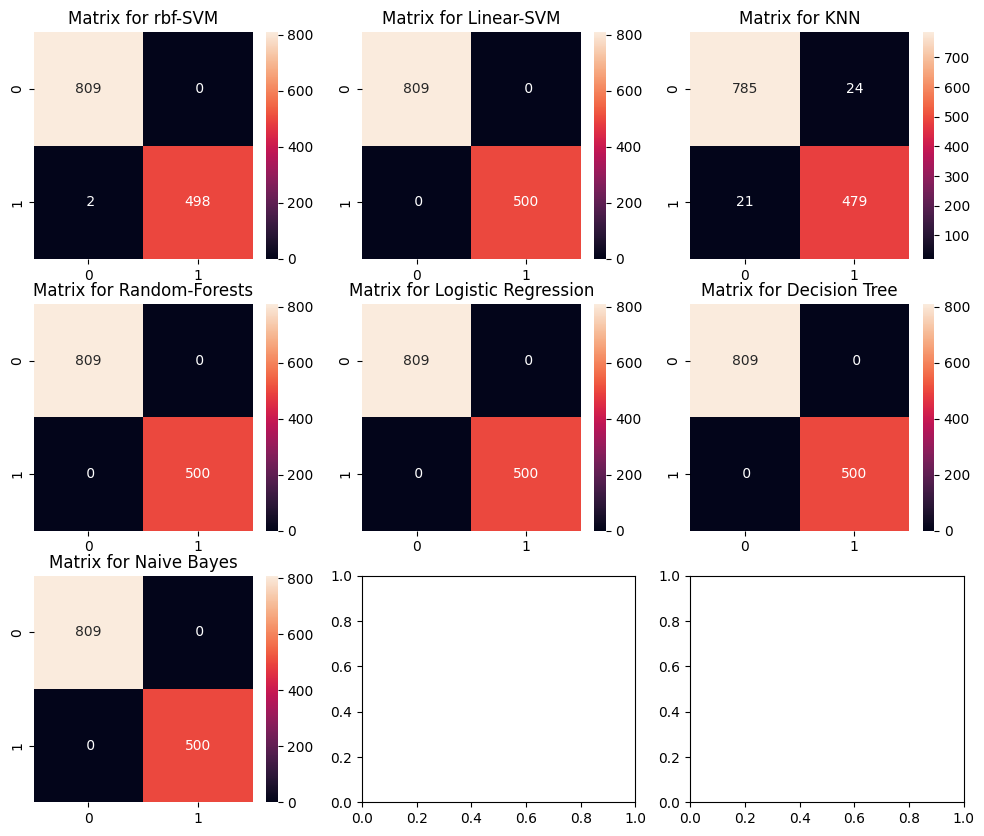

In [220]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)

In [221]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
1.0
SVC(C=0.05, gamma=0.1, kernel='linear')


In [222]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
1.0
RandomForestClassifier(random_state=0)


In [223]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

c:\environnement\.venv\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\environnement\.venv\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


The accuracy for ensembled model is: 0.7480916030534351
The cross validated score is 1.0


In [224]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

c:\environnement\.venv\lib\site-packages\sklearn\ensemble\_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\environnement\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


The accuracy for bagged KNN is: 0.7455470737913485


c:\environnement\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\environnement\.venv\lib\site-packages\skle

The cross validated score for bagged KNN is: 0.9809101585437464


In [225]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

c:\environnement\.venv\lib\site-packages\sklearn\ensemble\_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\environnement\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


The accuracy for bagged Decision Tree is: 0.7582697201017812


c:\environnement\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\environnement\.venv\lib\site-packages\skle

The cross validated score for bagged Decision Tree is: 1.0


In [226]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 1.0


In [227]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 1.0


In [229]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
1.0
AdaBoostClassifier(learning_rate=0.05, n_estimators=100)


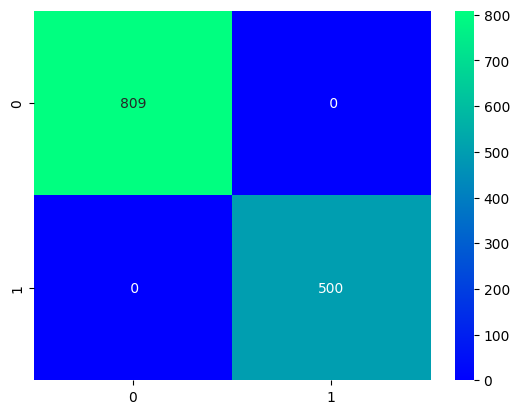

In [230]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

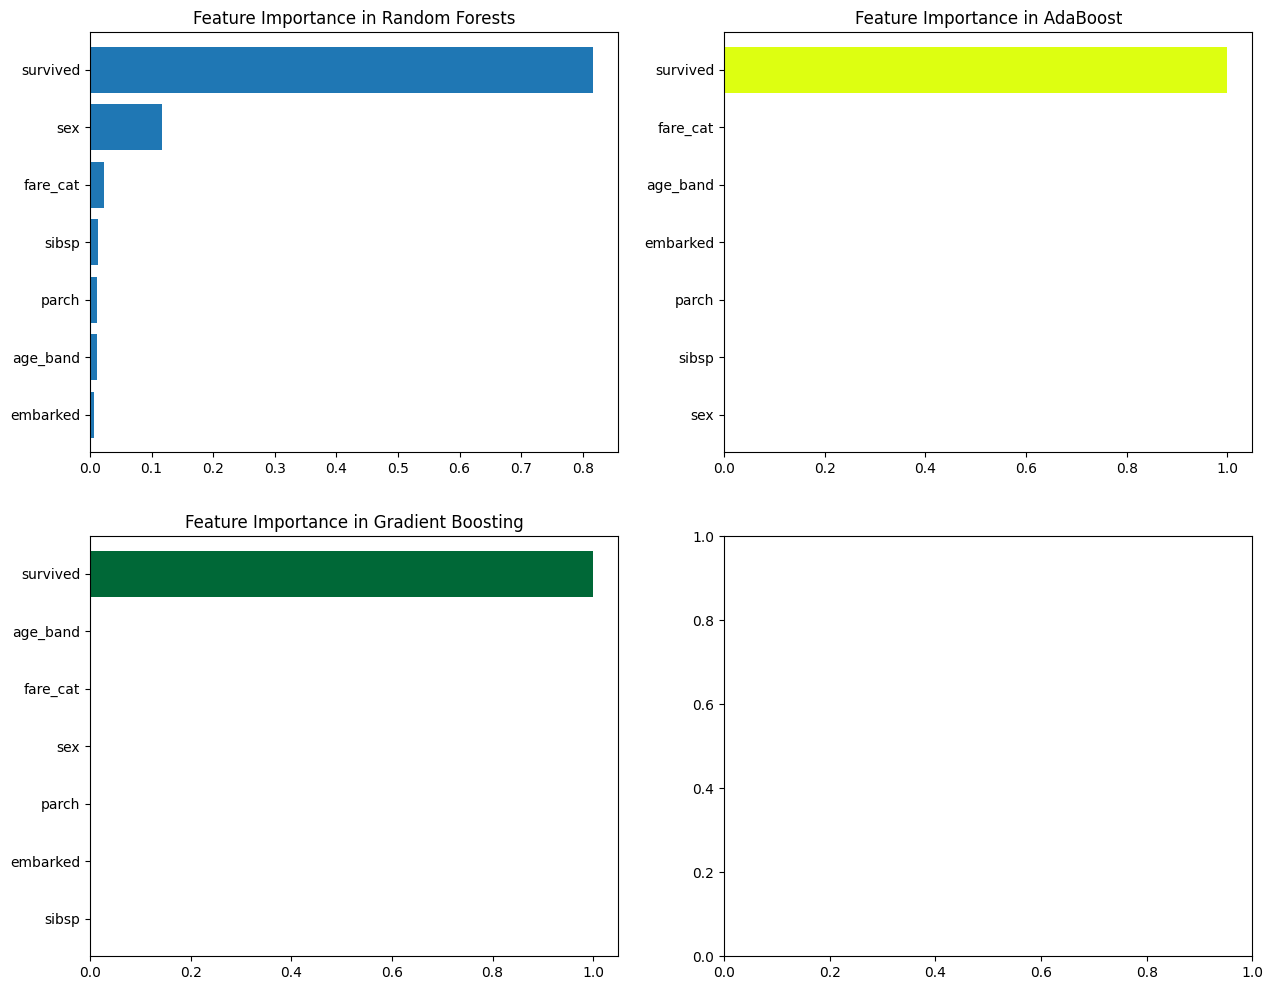

In [232]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
plt.show()